## 抖音数据可视化分析

- 背景
    - 抖音是一个面向全年龄的音乐短视频社区平台。目前用户众多，有不少人都成为了网红，聚集了大量粉丝。在此希望能看出一些他们之间的共性，帮助后来人少走一些弯路。并结合实际观察抖音运营存的现状，提出一些建议。  


- 目的：通过数据分析验证采集到的抖音网红的相关建议的真实性
    - 1.抖音98.52%的流量都会流向算法推荐视频，获得算法推荐是获得更多播放的关键所在。  
    - 2.最重要的始终是题材的选择，初始流量池大更容易获得算法青睐。  
    - 3.除去题材外，投稿的最佳时间日常是在0-5点，有平台活动一定要参与。  
    - 4.视频时长最好在7-10s，其次是0-6s及23s以内，最长也不建议超过40s。  
    - 5.背景音乐最好选择当下最流行的歌曲。  


- 数据来源（近600w条数据）
    - 抖音40天内的数据交互记录,一行数据就是一个播放记录
    

- 字段说明
    - uid：用户id
    - user_city：用户所在城市
    - item_id：作品id
    - author_id：作者id
    - item_city：作品城市
    - channel：观看到该作品的来源
    - finish：是否浏览完作品
    - like：是否对作品点赞
    - music_id：音乐id
    - device：设备id
    - time：作品发布时间
    - duration_time：作品时长

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline
#更改设计风格
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']#(显示中文）
plt.rcParams['axes.unicode_minus'] = False#(显示负数）

### 数据清洗&预处理

- 加载数据

In [2]:
data = pd.read_csv('./douyin.txt')
data.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,device,time,duration_time
0,18068,138,1312559,27947,23,0,1,0,-1,13717,3085992215,10
1,3456,-1,920393,36070,-1,1,0,0,-1,6895,3082715571,10
2,17128,-1,1201256,14657,11,1,1,0,-1,61358,3084094150,41
3,1368,81,2720842,26944,68,0,0,0,-1,1466,3086505995,10
4,15692,109,691661,18212,213,0,0,0,11513,540,3087035710,10


- 获取数据维度

In [3]:
data.shape

(5886702, 12)

- 检测是否存在空值

In [4]:
data.isnull().sum(axis=0)

uid              0
user_city        0
item_id          0
author_id        0
item_city        0
channel          0
finish           0
like             0
music_id         0
device           0
time             0
duration_time    0
dtype: int64

- 检测是否存在重复数据

In [5]:
data.duplicated().sum()

4924

- 删除重复数据

In [6]:
data.drop_duplicates(inplace=True)

- 重新设置索引

In [7]:
data.reset_index(drop=True,inplace=True)

- 缺失值处理：数据是进行过脱敏的数据，无法观察原有情况，不过可以推断其中的-1是缺失值直接删除即可。

In [8]:
data.replace(to_replace=-1,value=np.nan,inplace=True)

- 检测是否存在缺失值

In [9]:
data.isnull().sum()

uid                    0
user_city        1131869
item_id                0
author_id              0
item_city         222116
channel                0
finish                 0
like                   0
music_id         3769681
device                 0
time                   0
duration_time          0
dtype: int64

- 删除缺失值

In [10]:
data.dropna(axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)

- 数据清洗&预处理后数据维度

In [11]:
data.shape

(1737313, 12)

- 原始的数据列中存在device为设备ID，这个特征于分析无意义，可以将其删除

In [12]:
data.drop(labels='device',axis=1,inplace=True)

- 显示 DataFrame 的基本信息

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737313 entries, 0 to 1737312
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   uid            int64  
 1   user_city      float64
 2   item_id        int64  
 3   author_id      int64  
 4   item_city      float64
 5   channel        int64  
 6   finish         int64  
 7   like           int64  
 8   music_id       float64
 9   time           int64  
 10  duration_time  int64  
dtypes: float64(3), int64(8)
memory usage: 145.8 MB


In [14]:
data['finish'].unique()

array([0, 1], dtype=int64)

- time列是时间戳，此处修改成正常时间
    - time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(1511572885)) [通常是自1970年1月1日午夜以来的秒数]

In [15]:
data.head(1)

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,time,duration_time
0,15692,109.0,691661,18212,213.0,0,0,0,11513.0,3087035710,10


In [16]:
real_time = []
for i in data['time']:
    timeArray = time.localtime(i)
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    real_time.append(otherStyleTime)    
data['real_time'] = real_time

In [17]:
data.drop(labels='time',inplace=True,axis=1)

In [18]:
data['real_time'] = pd.to_datetime(data['real_time'])

In [19]:
data.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,duration_time,real_time
0,15692,109.0,691661,18212,213.0,0,0,0,11513.0,10,2067-10-28 21:55:10
1,44071,80.0,1243212,34500,68.0,0,0,0,1274.0,9,2067-10-21 22:27:03
2,10902,202.0,3845855,634066,113.0,0,0,0,762.0,10,2067-10-26 00:38:51
3,25300,21.0,3929579,214923,330.0,0,0,0,2332.0,15,2067-10-25 20:36:25
4,3656,138.0,2572269,182680,80.0,0,0,0,238.0,9,2067-10-21 20:46:29


- 时间列中既有日期也有具体的时分秒，网红建议发布视频的时间为0-5点，则需要将小时单独从日期中抽取出来作为新的一列
- 将年-月-日的时间也抽取出来作为新的一列

In [20]:
data['H'] = data.real_time.dt.hour
data['date']=data.real_time.dt.date
#将date转换成字符串类型
data['date'] = data.date.astype('str')

In [21]:
data.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,duration_time,real_time,H,date
0,15692,109.0,691661,18212,213.0,0,0,0,11513.0,10,2067-10-28 21:55:10,21,2067-10-28
1,44071,80.0,1243212,34500,68.0,0,0,0,1274.0,9,2067-10-21 22:27:03,22,2067-10-21
2,10902,202.0,3845855,634066,113.0,0,0,0,762.0,10,2067-10-26 00:38:51,0,2067-10-26
3,25300,21.0,3929579,214923,330.0,0,0,0,2332.0,15,2067-10-25 20:36:25,20,2067-10-25
4,3656,138.0,2572269,182680,80.0,0,0,0,238.0,9,2067-10-21 20:46:29,20,2067-10-21


In [22]:
#查看不同数据date的时间范围
data.date.unique()

array(['2067-10-28', '2067-10-21', '2067-10-26', '2067-10-25',
       '2067-10-22', '2067-09-24', '2067-10-27', '2067-10-18',
       '2067-10-06', '2067-10-24', '2067-10-30', '2067-10-16',
       '2067-10-23', '2067-10-20', '2067-10-19', '2067-10-29',
       '2067-10-11', '2067-10-15', '2067-10-04', '2067-10-03',
       '2067-10-07', '2067-10-01', '2067-10-09', '2067-10-17',
       '2067-10-05', '2067-10-13', '2067-09-29', '2067-09-28',
       '2067-10-02', '2067-10-12', '2067-10-14', '2067-09-30',
       '2067-10-10', '2067-09-27', '2067-10-08', '2067-09-25',
       '2067-09-23', '2067-09-22', '2067-09-26', '2067-09-21',
       '2067-02-21'], dtype=object)

In [23]:
data.date.min()

'2067-02-21'

In [24]:
#删除2月份时间
data.drop(labels=data.loc[data.date == '2067-02-21'].index,inplace=True)

In [25]:
data.reset_index(drop=True,inplace=True)

In [26]:
data.shape

(1737312, 13)

### 数据分析
- 抖音网红视频数据分析
    - 抖音播放量来源分布 
    - 视频时长与点赞完播率之间的关系 
        - 作品时长与播放量的关系  
        - 作品时长与作品数量的关系
        - 作品时长与完播率的关系
        - 作品时长与点赞率的关系
- 背景音乐与点赞完播率之间的关系
    - 热门的音乐ID  
    - 热门的歌曲点赞率与完播率  
    - 热门的歌曲点赞率与完播率随时间变化的曲线  

- 抖音播放量来源分布 

In [27]:
channel = data.groupby(by='channel').count()['uid']
channel

channel
0    1710980
2          2
3      25358
4        972
Name: uid, dtype: int64

- 结论1： 虽然没有明确说明，但作为算法驱动的短视频平台，显然可知“0”是算法推荐的视频。那么在抖音获得播放量的关键就是获得算法推荐进入更大的流量池。

- 作品时长与播放量的关系

duration_time
0         18
1         90
2      18339
3      14337
4      51232
       ...  
119        1
187        2
555        1
620        3
640        6
Name: uid, Length: 72, dtype: int64

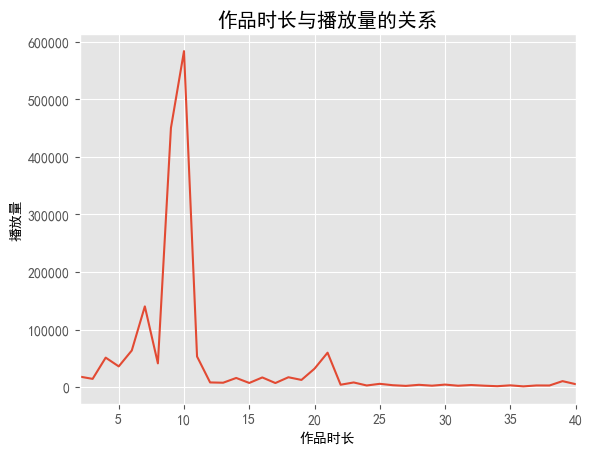

In [28]:
item_duration = data.groupby(by='duration_time').count()['uid']
plt.plot(item_duration)
plt.xlim(2,40)
plt.xlabel('作品时长')
plt.ylabel('播放量')
plt.title("作品时长与播放量的关系")
item_duration

- 作品时长与作品数量的关系

Text(0.5, 1.0, '作品时长与作品数量的关系')

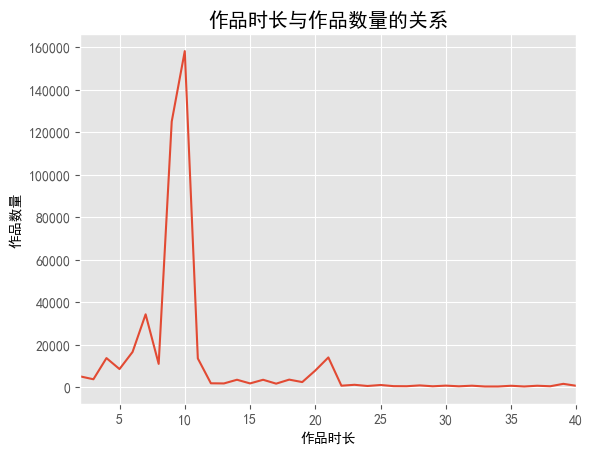

In [29]:
duration_nums = data.groupby('duration_time')['item_id'].nunique()
plt.plot(duration_nums)
plt.xlim(2,40)
plt.xlabel('作品时长')
plt.ylabel('作品数量')
plt.title("作品时长与作品数量的关系")

- 作品时长与完播率的关系
    - 完播率和点赞率可以用不同播放时长的作品对应的完播和点赞的均值表示


Text(0.5, 1.0, '作品时长与完播率的关系')

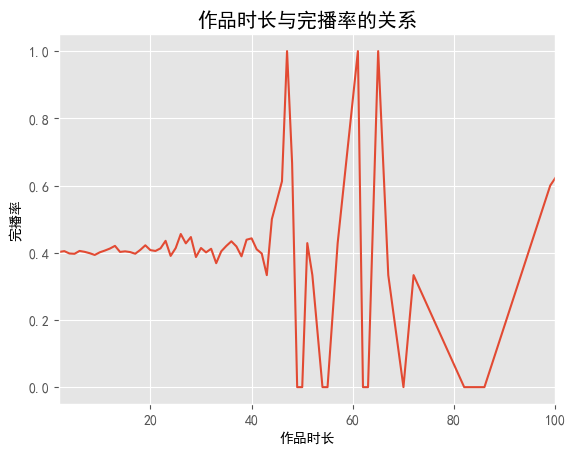

In [30]:
finish_p = data.groupby('duration_time')['finish'].mean()
plt.plot(finish_p)
plt.xlim(2,100)
plt.xlabel('作品时长')
plt.ylabel('完播率')
plt.title("作品时长与完播率的关系")

- 作品时长与点赞率的关系

Text(0.5, 1.0, '作品时长与点赞率的关系')

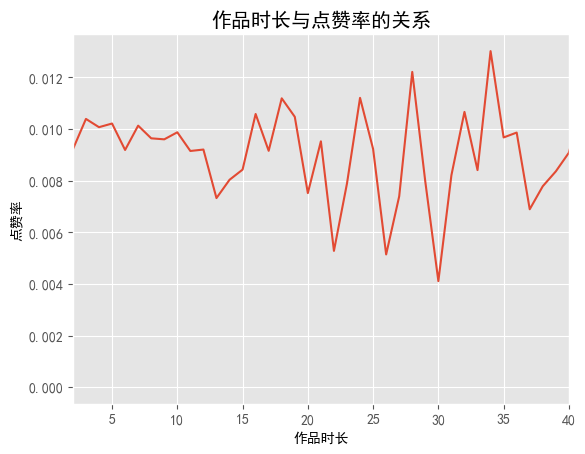

In [31]:
like_p = data.groupby('duration_time')['like'].mean()
plt.plot(like_p)
plt.xlim(2,40)
plt.xlabel('作品时长')
plt.ylabel('点赞率')
plt.title("作品时长与点赞率的关系")

- 观察结果：
    - 作品绝大多数分布在7-10s中，总体来说在0s-22s之间都有一定数量的投稿，22s以上的就很少了。
    - 播放量的分布基本与作品数量相同。
    - 完播率在2s-40s内总体在40%以上，40s以后开始剧烈波动，因此作品时长应该设置在40s之内比较稳妥
    - 点赞率在2s-10s内基本维持在1%之内，在12s-20s之间会在0.7%-1.1%之间波动，在20s以后数据变化的波动完全没有规律。

- 结论2： 
    - 视频时长最好在7-10s，其次是0-6s及23s以内，最长也不建议超过40s

- 作品发布时间（小时）与点赞完播率之间的关系

Text(0.5, 1.0, '作品发布时间与点赞完播率之间的关系')

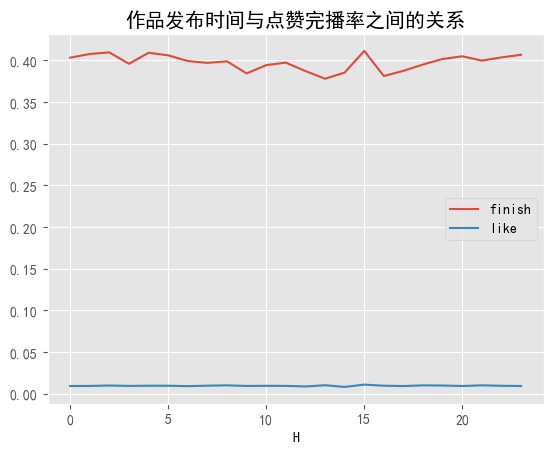

In [32]:
H_f_l = data.groupby('H')[['finish','like']].mean()
H_f_l.plot()
plt.title("作品发布时间与点赞完播率之间的关系")

- 发布作品时间和播放量之间的关系

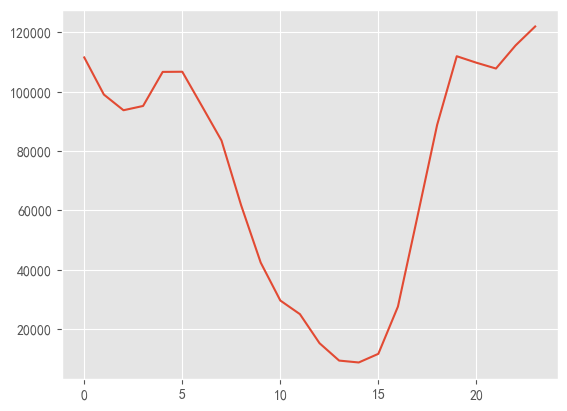

In [33]:
time_play_s = data.groupby('H')['uid'].count()
plt.plot(time_play_s)

- 24小时内用户投稿（发布作品）数量的变化
    - 关注大多数用户都是什么时间投稿（考虑去重）

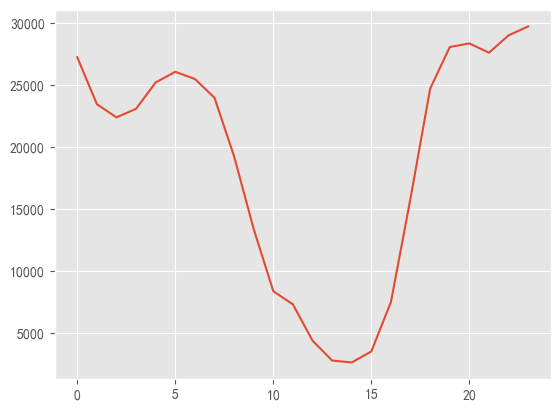

In [34]:
public_item_s = data.groupby('H')['item_id'].nunique()
plt.plot(public_item_s)

- 放在一起观察，给出结论

- 结论3： 
    - 不同时间段内发布的作品点赞率和完播率不会有太大变化，整体播放量和投稿数也基本相同,这说明播放量和投稿时间关系亦不大，不过还是可以看出0-5点的播放量会略高。
    - 如果投稿最佳时间是在0-5点，但并无特殊优势。

- 背景音乐播放量之间的关系
     - 查找被作品使用次数最多的前10首音乐id
     - 查看10首音乐id的播放量是否是最高的

In [35]:
music_play_s = data.groupby(by='music_id')['uid'].count().sort_values(ascending=False)
top_10_music = music_play_s.iloc[:10] #选择从位置 0 到位置 9的数据
top_10_music

music_id
22.0     51627
220.0    41412
25.0     27837
68.0     22365
110.0    21087
33.0     17543
468.0    17179
57.0     13347
43.0     13197
238.0    12563
Name: uid, dtype: int64

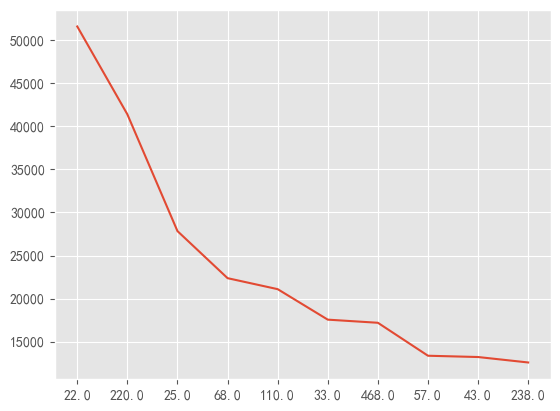

In [36]:
plt.plot(top_10_music.index.astype('str'),top_10_music.values)

- 结论4： 对于视频配乐更推荐当时最火的歌曲，会比其他歌曲更容易获得高播放量。